### Establishing the columns with dates so we can use them later


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [9]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [1]:
# I had to leave the project for a few days so lets take it from here, I already saw the data and I think I need to parse the dates in order to manipulate them
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv("data/train.csv",
           low_memory=False,
           parse_dates = ["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


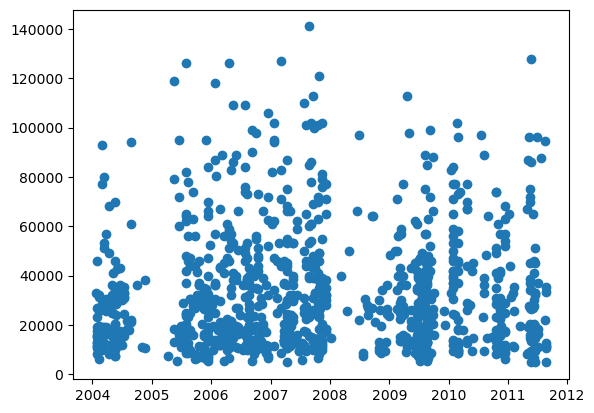

In [2]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [3]:
### Sort DataFrame by saledate
df.sort_values(by=["saledate"], inplace = True, ascending=True )
df.head(100)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119369,1460341,120000,458891,4140,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
113547,1449754,11000,1486544,3356,132,99.0,1967,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101796,1421628,76000,1453580,3877,132,99.0,1979,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
30968,1262978,11500,1418962,6945,132,4.0,1978,NaN,NaN,1989-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [4]:
# lets make a copy of the df 4 backup
df_copy = df.copy()
df_copy.head(100)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119369,1460341,120000,458891,4140,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
113547,1449754,11000,1486544,3356,132,99.0,1967,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101796,1421628,76000,1453580,3877,132,99.0,1979,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
30968,1262978,11500,1418962,6945,132,4.0,1978,NaN,NaN,1989-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [5]:
# Lets split the date column so we can take advantage of the individual elements just if we need it in the future
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayYear"] = df_copy.saledate.dt.dayofyear

In [6]:
df_copy.head(100)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayWeek,saleDayYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119369,1460341,120000,458891,4140,132,99.0,1986,NaN,NaN,1989-01-31,...,None or Unspecified,Semi U,None or Unspecified,NaN,NaN,1989,1,31,1,31
113547,1449754,11000,1486544,3356,132,99.0,1967,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
101796,1421628,76000,1453580,3877,132,99.0,1979,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
30968,1262978,11500,1418962,6945,132,4.0,1978,NaN,NaN,1989-02-01,...,NaN,NaN,NaN,Standard,Conventional,1989,2,1,2,32


In [7]:
df_copy.drop("saledate",axis =1, inplace= True) # Now lets drop the saledate, we have it saved in the original df anyway

## Handling with NAs and non numeric values

In [8]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [9]:
# But first get rid of the strings
for label, value in df_copy.items():
    if pd.api.types.is_string_dtype(value) :
        df_copy[label] = value.astype("category").cat.as_ordered()

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   object  
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  object  
 12  fiModelSeries             56908 non-null   object  
 13  fiModelDescriptor         719

In [11]:
pd.api.types.pandas_dtype(df_copy["Coupler"].dtype)

dtype('O')

In [12]:
pd.api.types.pandas_dtype(df_copy["Coupler"].dtype)

dtype('O')

In [13]:
# This objects are not strings but checking the data I think I can convert them into categories maybe de NAs arent string?? IDK
for label, value in df_copy.items():
    if pd.api.types.pandas_dtype(df_copy[label].dtype)== "O":
        df_copy[label] = value.astype("category").cat.as_ordered()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [14]:
pd.api.types.pandas_dtype(df_copy["Coupler"].dtype)

CategoricalDtype(categories=['Hydraulic', 'Manual', 'None or Unspecified'], ordered=True, categories_dtype=object)

In [15]:
pd.api.types.pandas_dtype(df_copy["Steering_Controls"].dtype) # it seems about right

CategoricalDtype(categories=['Command Control', 'Conventional', 'Four Wheel Standard',
                  'No', 'Wheel'],
, ordered=True, categories_dtype=object)

In [16]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayWeek,saleDayYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


In [17]:
df_copy.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [18]:
# Now lets get rid of NaNs and check how much missing data we have
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

In [19]:
# Lets save this as a csv in case we need to restart and take it again
df_copy.to_csv("data/train_tmp.csv",index=False)

# Fill Missing Values

In [20]:
# Fill numeric columns with median of the columns
# First we we will check if we have any? 
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(df_copy[label]):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayWeek
saleDayYear


In [21]:
df_copy["MachineID"].head() # Just checking

205615    1126363
92803     1169900
98346     1262088
169297    1433229
274835    1194089
Name: MachineID, dtype: int64

In [22]:
for label, value in df_copy.items():
    if pd.api.types.is_numeric_dtype(df_copy[label]):
        if pd.isnull(value).sum():
            # Add a column to the df to identify later if the value filled was originaly null
            df_copy[label+"_og_missing"] = pd.isnull(value)
            #Fill the value with the median
            df_copy[label] = value.fillna(value.median())

In [23]:
# Check the og missing columns
df_copy.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayWeek,saleDayYear,auctioneerID_og_missing,MachineHoursCurrentMeter_og_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,NaN,416,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,NaN,12G,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,NaN,644,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
75378,1363540,22500,1413842,7267,132,99.0,1976,0.0,NaN,930,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
81383,1379228,31000,1082797,7620,132,99.0,1986,0.0,NaN,IT12,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
134080,1491298,46000,1322436,4107,132,99.0,1987,0.0,NaN,D4H,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
55455,1305337,17000,1517075,3356,132,99.0,1972,0.0,NaN,12F,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
55454,1305336,17000,1236263,3356,132,99.0,1972,0.0,NaN,12F,...,NaN,NaN,NaN,1989,1,31,1,31,False,True


In [24]:
df_copy.isna().sum() #Check on the numerics

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              331486
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        137191
fiModelSeries                          344217
fiModelDescriptor                      329206
ProductSize                            210775
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           296764
Enclosure                                 325
Forks                             

In [25]:
for label, value in df_copy.items():
    if not pd.api.types.is_numeric_dtype(value):
        # Add the same indicator missing column
        df_copy[label+"_og_missing"] = pd.isnull(value)
        # Replace the category with 0 and add a +1 to the other cats so we know 4 sure the 0 is the missing category
        df_copy[label] = pd.Categorical(value).codes +1

In [26]:
df_copy.isna().sum() # oh yeeaaaah

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_og_missing     0
Blade_Type_og_missing           0
Travel_Controls_og_missing      0
Differential_Type_og_missing    0
Steering_Controls_og_missing    0
Length: 103, dtype: int64

# We have to replicate the data processing with the valid data set

In [27]:
# Now lets replicate the data processing for the validation data set and the test data set.
# There is a file called train and valid in the competition and we could "make our own" validation set splitting that but there is also a validation set ready
df_valid = pd.read_csv("data/Valid.csv",
                       low_memory=False,
                    parse_dates = ["saledate"])
df_valid.head(20)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,2012-01-05,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,2012-01-05,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,2012-01-05,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,2012-01-05,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,2012-01-04,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5,1222847,530790,7019,121,3,2001,0.0,NaN,2012-01-05,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1222849,1040520,3854,121,3,1000,1529.0,Low,2012-01-05,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
7,1222850,1061730,3854,121,3,1000,3998.0,Low,2012-01-05,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1222855,531393,23926,121,3,1000,8145.0,Low,2012-01-04,12HNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1222863,317287,4106,121,3,2002,3211.0,Low,2012-01-05,D4G,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [28]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  int64         
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  4739 non-null   float64       
 7   UsageBand                 4031 non-null   object        
 8   saledate                  11573 non-null  datetime64[ns]
 9   fiModelDesc               11573 non-null  object        
 10  fiBaseModel               11573 non-null  object        
 11  fiSecondaryDesc           8037 non-null   object        
 12  fiModelSeries     

In [29]:
# We dont have the sale price column here it appears that the comptetition had a rule that you couldnt see it until a few days before the competition ended
# So we have to import it separatly
# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv(filepath_or_buffer="data/ValidSolution.csv")

# Map valid_solution to valid_df
df_valid["SalePrice"] = df_valid["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])


In [30]:
# Now Lets do the same than with train.csv
# Getting the extra columns
df_valid["saleYear"] = df_valid.saledate.dt.year
df_valid["saleMonth"] = df_valid.saledate.dt.month
df_valid["saleDay"] = df_valid.saledate.dt.day
df_valid["saleDayWeek"] = df_valid.saledate.dt.dayofweek
df_valid["saleDayYear"] = df_valid.saledate.dt.dayofyear

# Dropping the OG sale date
df_valid.drop("saledate",axis =1, inplace= True)


In [31]:
# Assuming data is in the same format in every .csv of the competition lets deal with it the same
for label, value in df_valid.items():
    if pd.api.types.pandas_dtype(df_valid[label].dtype)== "O" or pd.api.types.is_string_dtype(value):
        df_valid[label] = value.astype("category").cat.as_ordered()
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   11573 non-null  int64   
 1   MachineID                 11573 non-null  int64   
 2   ModelID                   11573 non-null  int64   
 3   datasource                11573 non-null  int64   
 4   auctioneerID              11573 non-null  int64   
 5   YearMade                  11573 non-null  int64   
 6   MachineHoursCurrentMeter  4739 non-null   float64 
 7   UsageBand                 4031 non-null   category
 8   fiModelDesc               11573 non-null  category
 9   fiBaseModel               11573 non-null  category
 10  fiSecondaryDesc           8037 non-null   category
 11  fiModelSeries             1759 non-null   category
 12  fiModelDescriptor         2897 non-null   category
 13  ProductSize               5743 non-null   cate

In [32]:
df_valid.isnull().sum()/len(df_copy) # Get the nulls

SalesID                     0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.017037
UsageBand                   0.018802
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.008815
fiModelSeries               0.024466
fiModelDescriptor           0.021629
ProductSize                 0.014534
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.022055
Enclosure                   0.000022
Forks                       0.014796
Pad_Type                    0.023960
Ride_Control                0.018575
Stick                       0.023960
Transmission                0.016942
Turbocharged                0.023960
Blade_Extension             0.026947
B

In [33]:
# Get rid of the nas numerics and cats at the same time
for label, value in df_valid.items():
    if pd.api.types.is_numeric_dtype(df_valid[label]):
        if pd.isnull(value).sum():
            # Add a column to the df to identify later if the value filled was originaly null
            df_valid[label+"_og_missing"] = pd.isnull(value)
            #Fill the value with the median
            df_valid[label] = value.fillna(value.median())
    else:
        # Add the same indicator missing column
        df_valid[label+"_og_missing"] = pd.isnull(value)
        # Replace the category with 0 and add a +1 to the other cats so we know 4 sure the 0 is the missing category
        df_valid[label] = pd.Categorical(value).codes +1

In [34]:
df_valid.info(), df_valid.isnull().sum()# Done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Columns: 102 entries, SalesID to Steering_Controls_og_missing
dtypes: bool(45), float64(2), int16(2), int32(5), int64(6), int8(42)
memory usage: 1.9 MB


(None,
 SalesID                         0
 MachineID                       0
 ModelID                         0
 datasource                      0
 auctioneerID                    0
                                ..
 Backhoe_Mounting_og_missing     0
 Blade_Type_og_missing           0
 Travel_Controls_og_missing      0
 Differential_Type_og_missing    0
 Steering_Controls_og_missing    0
 Length: 102, dtype: int64)

In [35]:
# Split and assign the proccesed data
xTrain,yTrain= df_copy.drop(["SalePrice","auctioneerID_og_missing"],axis=1), df_copy["SalePrice"]
xValid, yValid = df_valid.drop("SalePrice",axis=1), df_valid["SalePrice"]

xTrain.shape, yTrain.shape, xValid.shape, yValid.shape


((401125, 101), (401125,), (11573, 101), (11573,))

In [36]:
# In order to experiment with difrerent models we are going to create a function: 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Function that calculates root mean squared los error between predictions and true labels
def rmsle(yTest,yPreds):
    return np.sqrt(mean_squared_log_error(yTest,yPreds))

# Function to evaluate model on a few diff levels
def show_scores(model):
    trainPreds = model.predict(xTrain)
    valPreds = model.predict(xValid)
    scores = {"Trainning MAE": mean_absolute_error(yTrain,trainPreds),
             "Valid MAE": mean_absolute_error(yValid,valPreds),
             "Trainning RMSLE":rmsle(yTrain,trainPreds),
             "Valid RMSLE": rmsle(yValid,valPreds),
             "Train R2 Score": r2_score(yTrain,trainPreds),
             "Valid R2 Score": r2_score(yValid,valPreds)}
    return scores


### Tunning hyperparameters with Randomized Search CV


In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Lets set up a grid
rfGrid = {"n_estimators": np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.2,1]}
         #"max_samples":[10000]}# To cut down the processing time we will not use the entire set to get a good parameter combination

#Lets go with the Random Search
rsModel = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                             param_distributions=rfGrid,
                             n_iter=200,
                             cv=10,
                             verbose=True)
rsModel.fit(xTrain,yTrain)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.2, 1],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [52]:
# Reassigning the model with the best parameters but getting all the data settings MAx_samples to default (none)
# I made it twice 
rsModelNew = RandomForestRegressor(max_features=0.2,
                      min_samples_leaf=np.int64(3),
                      min_samples_split=np.int64(6), n_estimators=np.int64(90),
                      n_jobs=-1, random_state=42)# this one without the max samoles set to 10000

rsModelOld = RandomForestRegressor(max_features=0.2,
                      min_samples_leaf=np.int64(1),
                      min_samples_split=np.int64(2), n_estimators=np.int64(50),
                      n_jobs=-1, random_state=42)

In [53]:
#Fit the model
rsModelNew.fit(xTrain,yTrain)
rsModelOld.fit(xTrain,yTrain)

RandomForestRegressor(max_features=0.2, min_samples_leaf=np.int64(1),
                      min_samples_split=np.int64(2), n_estimators=np.int64(50),
                      n_jobs=-1, random_state=42)

In [54]:
# Score again new
show_scores(rsModelNew)

{'Trainning MAE': 3132.5501841214877,
 'Valid MAE': 11657.602918752997,
 'Trainning RMSLE': np.float64(0.15322072589997363),
 'Valid RMSLE': np.float64(0.424970496162051),
 'Train R2 Score': 0.9533332219982575,
 'Valid R2 Score': 0.551163085264769}

In [55]:
# Score again Old
show_scores(rsModelOld)

{'Trainning MAE': 1695.6247187339725,
 'Valid MAE': 11622.18827500792,
 'Trainning RMSLE': np.float64(0.08907933592873322),
 'Valid RMSLE': np.float64(0.42683928935172044),
 'Train R2 Score': 0.98597374629992,
 'Valid R2 Score': 0.5596212600170196}

In [56]:
# Is not good but is better 
rsModel = rsModelOld

In [78]:
# Now we have to prepare de Test data in order to see the results
df_test = pd.read_csv("data/Test.csv",
                     parse_dates=["saledate"],
                     low_memory=False)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [74]:
# Process all again
# Shoul have done the func earlier
def formatDf(df):
    # Now Lets do the same than with train and valid.csv
    # Getting the extra columns
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayWeek"] = df.saledate.dt.dayofweek
    df["saleDayYear"] = df.saledate.dt.dayofyear

    # Dropping the OG sale date
    df.drop("saledate",axis =1, inplace= True)

    # Assuming data is in the same format in every .csv of the competition lets deal with it the same
    for label, value in df_test.items():
        if pd.api.types.pandas_dtype(df[label].dtype)== "O" or pd.api.types.is_string_dtype(value):
            df[label] = value.astype("category").cat.as_ordered()

    # Get rid of the nas numerics and cats at the same time
    for label, value in df.items():
        if pd.api.types.is_numeric_dtype(df[label]):
            if pd.isnull(value).sum():
                # Add a column to the df to identify later if the value filled was originaly null
                df[label+"_og_missing"] = pd.isnull(value)
                #Fill the value with the median
                df[label] = value.fillna(value.median())
        else:
            # Add the same indicator missing column
            df[label+"_og_missing"] = pd.isnull(value)
            # Replace the category with 0 and add a +1 to the other cats so we know 4 sure the 0 is the missing category
            df[label] = pd.Categorical(value).codes +1
    return df

In [79]:
df_test=formatDf(df_test)

In [80]:
df_test.isna().sum(), df_test.info() # Done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_og_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


(SalesID                         0
 MachineID                       0
 ModelID                         0
 datasource                      0
 auctioneerID                    0
                                ..
 Backhoe_Mounting_og_missing     0
 Blade_Type_og_missing           0
 Travel_Controls_og_missing      0
 Differential_Type_og_missing    0
 Steering_Controls_og_missing    0
 Length: 101, dtype: int64,
 None)

In [85]:
test_preds = rsModel.predict(df_test)

In [86]:
test_preds

array([18003., 19232., 47760., ..., 17990., 21010., 29265.],
      shape=(12457,))

In [89]:
# The original competition in kaggle asked to compare the sales id with the sales price predicted (https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation)so...
df_preds = pd.DataFrame()
df_preds["SalesId"], df_preds["SalesPrice"] = df_test["SalesID"],test_preds
df_preds

,SalesId,SalesPrice
0,1227829,18003.0
1,1227844,19232.0
2,1227847,47760.0
3,1227848,47235.0
4,1227863,50914.0
...,...,...
12452,6643171,34575.0
12453,6643173,20340.0
12454,6643184,17990.0
12455,6643186,21010.0


In [90]:
df_preds.to_csv("data/testPreds.csv", index=False)# Just to save it as independent data to share

## Finally I like to get the most important features

In [92]:
# Finde feature importance of the model
rsModel.feature_importances_

array([3.67846369e-02, 3.32296163e-02, 4.89273325e-02, 4.83456090e-03,
       6.95836752e-03, 1.38475800e-01, 6.68776735e-03, 2.54463124e-03,
       4.79689550e-02, 3.61557214e-02, 7.18066539e-02, 7.03699021e-03,
       2.83940239e-02, 7.48054795e-02, 4.08111021e-02, 1.09825766e-02,
       8.68556428e-03, 6.49480994e-03, 4.23137840e-03, 4.53236695e-02,
       1.76907140e-03, 6.46931840e-04, 2.47387395e-03, 1.23061099e-03,
       2.23942801e-03, 4.26593615e-03, 6.44090553e-04, 9.47741855e-03,
       4.27353629e-03, 2.99175280e-03, 6.13356767e-03, 3.20685874e-03,
       6.41266904e-03, 5.43825307e-04, 4.53006835e-03, 1.21929338e-02,
       1.58573432e-03, 1.25320571e-02, 5.37400481e-03, 9.91928963e-03,
       3.47102170e-03, 2.09100441e-03, 4.49797009e-03, 1.41969847e-03,
       1.79281569e-03, 9.25555545e-04, 1.75873967e-03, 6.58017630e-03,
       2.66008349e-03, 5.93935895e-04, 4.66531149e-04, 5.93921651e-02,
       8.62825022e-03, 1.15488946e-02, 6.85864086e-03, 1.47168447e-02,
      

In [106]:
# Better a function for plotting this
def featureScorePlt(columns, importances,n=20):
    df = (pd.DataFrame({"Features": columns,
                       "Importances": importances}).sort_values("Importances",ascending=False).reset_index(drop=True))

    # Plot the df
    fig,ax = plt.subplots()
    ax.barh(df["Features"][:n],df["Importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Importances")
    ax.invert_yaxis()

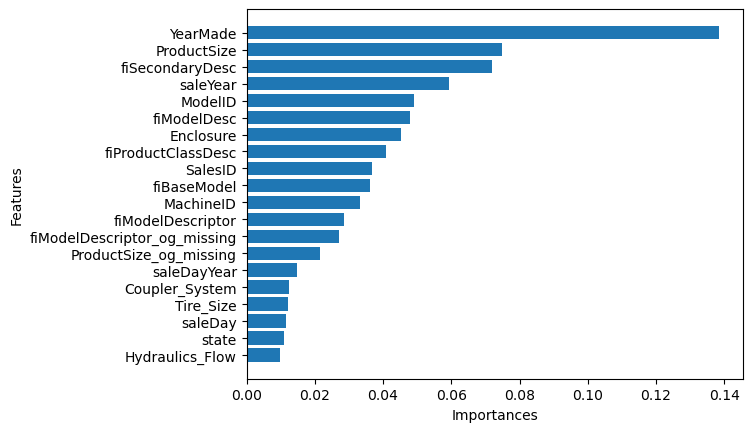

In [107]:
featureScorePlt(xTrain.columns,rsModel.feature_importances_)